<span STYLE="font-size:150%"> 
    Segment microCT scans
</span>

Docker image: gnasello/slicer-env:2023-07-06 \
Latest update: 10 March 2023

- load image stack in Slicer
- segment mineralized tissue
- compute segmented statistics (volumes)

In [1]:
# Monitor Memory in Slicer
import psutil, os
print(psutil.Process(os.getpid()).memory_info().rss / (1024**3), "GB used")

0.7238197326660156

GB used

# Load libraries

In [2]:
import pyslicer as ps
import slicer
from pathlib import Path
import pandas as pd

# Volume input

## Load `.nrrd` file into 3D Slicer

Write the path of the `.nrrd` file and load it to Slicer

In [3]:
# this cell is tagged 'parameters'
volume_file = 'microCT_volume/microCT_volume.nrrd'
output_dir_path = 'segmented_volumes'

In [4]:
# Parameters
volume_file = "/config/researcher_home/Documents/microCT/2025-12-17_GN009/111701/microCT_volume/microCT_volume_preview.nrrd"
output_dir_path = "/config/researcher_home/Documents/microCT/2025-12-17_GN009/111701/segmented_volumes"


In [5]:
path = Path(volume_file)

# Remove image numbering _0000, _0001 ...
filename_output = path.stem[:-4]

In [6]:
masterVolumeNode = slicer.util.loadNodeFromFile(volume_file)

Print spacing

In [7]:
## mm
masterVolumeNode.GetSpacing()

(0.01799928, 0.01799928, 0.01799928)

Make ```segmented_volumes``` folder

In [8]:
output_directory = Path(output_dir_path)

output_directory.mkdir(parents=True, exist_ok=True)

# Create segmentationNode

## Create segmentation-related nodes

Create segmentation node

In [9]:
segmentationNode = ps.segmentation.segmentationNode(name='Segmentation')

Create temporary segment editor to get access to effects

In [10]:
segmentEditorWidget, segmentEditorNode = ps.segmentation.segmentEditorWidget(segmentationNode = segmentationNode, 
                                                                             masterVolumeNode = masterVolumeNode)

In [11]:
# Monitor Memory in Slicer
import psutil, os
print(psutil.Process(os.getpid()).memory_info().rss / (1024**3), "GB used")

1.2539215087890625

GB used

# Thresholding

## Check different automatic segmentation algorithms

The first time you analyze an image/channel. Go to the ```Segment Editor```, add a new segment and choose the thresholding method. There you test different automatic thresholding technique and choose the one working best. For later analysis, you can just copy the thresholding values in the ```segments_greyvalues``` object at the beginning of this notebook.

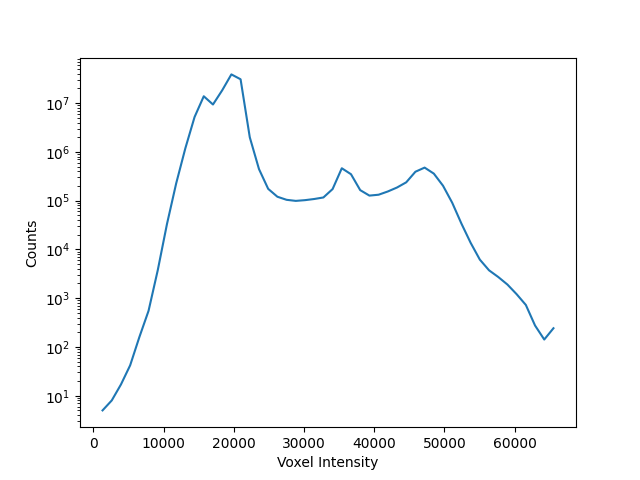

In [12]:
ps.volume.plot_histogram(masterVolumeNode, yscale='log')

Get automatic thresholding values, as indicated in [this script](https://github.com/jzeyl/3D-Slicer-Scripts/blob/db51967cc642837e8bae0fea1585a95074d8420b/load_dicom_modified_otsu.py#L56)

In [13]:
methods = [
            'HUANG',
            'INTERMODES',
            'ISO_DATA',
            'KITTLER_ILLINGWORTH',
            'LI',
            'MAXIMUM_ENTROPY',
            'MOMENTS',
            'OTSU',
            'RENYI_ENTROPY',
            'SHANBHAG',
            'TRIANGLE',
            'YEN'
            ]

thresholds = dict.fromkeys(methods, None)
thresholds

{'HUANG': None,
 'INTERMODES': None,
 'ISO_DATA': None,
 'KITTLER_ILLINGWORTH': None,
 'LI': None,
 'MAXIMUM_ENTROPY': None,
 'MOMENTS': None,
 'OTSU': None,
 'RENYI_ENTROPY': None,
 'SHANBHAG': None,
 'TRIANGLE': None,
 'YEN': None}

Otsu thresholding

OTSU threshold: 29700.1875

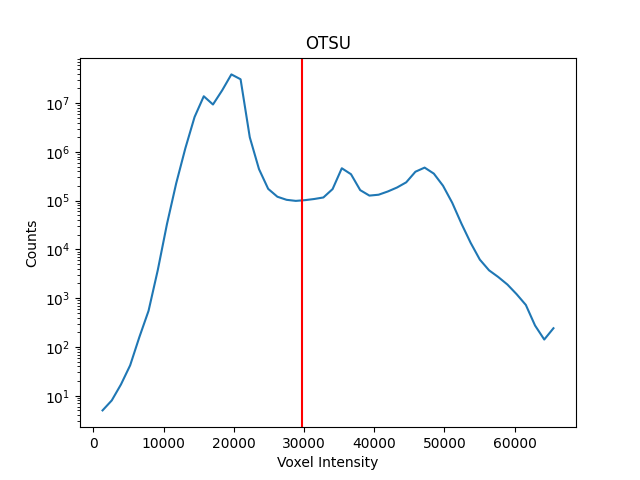

In [14]:
method = 'OTSU'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

Huang thresholding

HUANG threshold: 16898.3828125

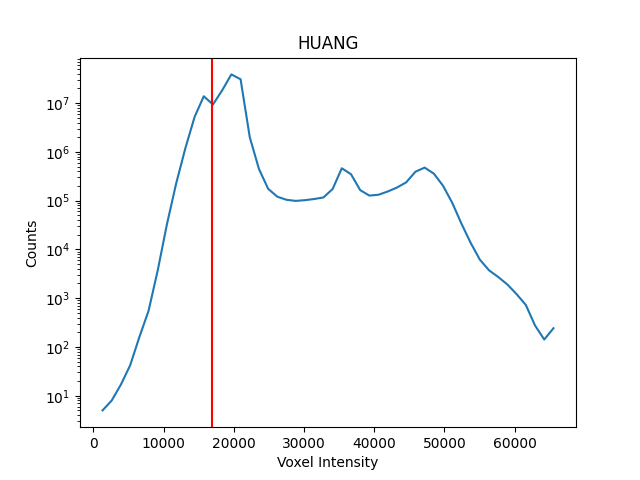

In [15]:
method = 'HUANG'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

IsoData thresholding

ISO_DATA threshold: 30212.259765625

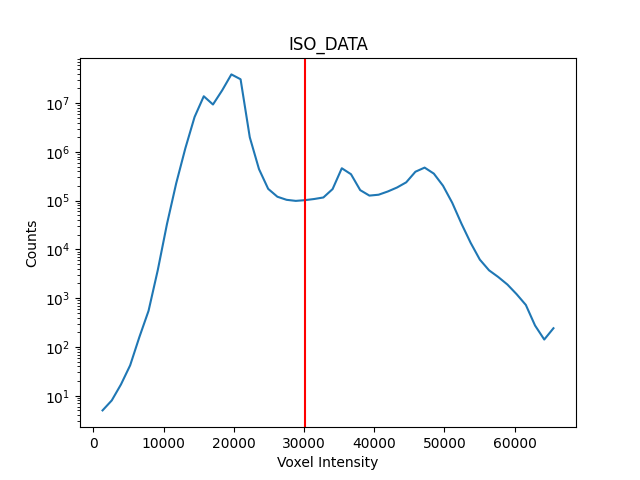

In [16]:
method = 'ISO_DATA'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

MAXIMUM_ENTROPY thresholding

MAXIMUM_ENTROPY threshold: 22019.10546875

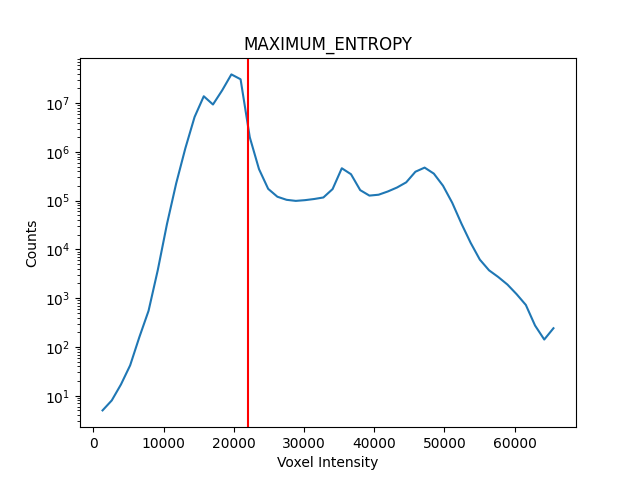

In [17]:
method = 'MAXIMUM_ENTROPY'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

MOMENTS thresholding

MOMENTS threshold: 20994.9609375

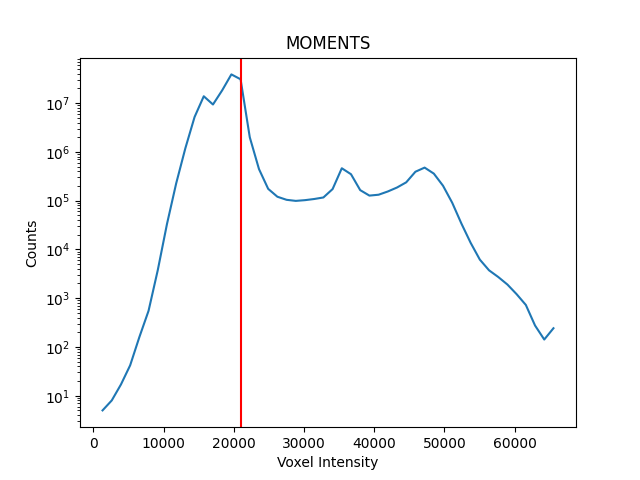

In [18]:
method = 'MOMENTS'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

INTERMODES thresholding

INTERMODES threshold: 32260.548828125

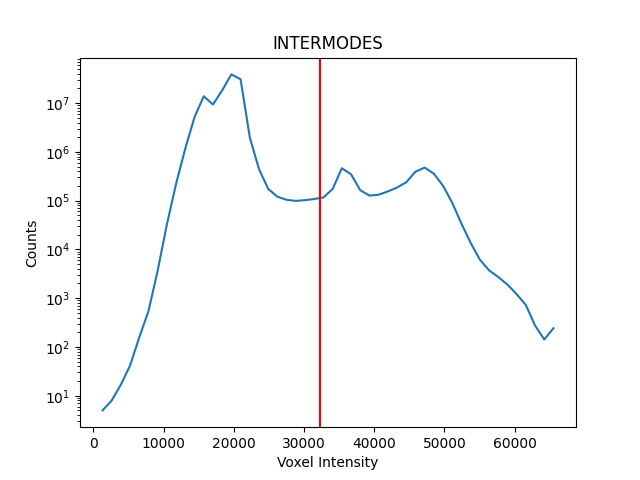

In [19]:
method = 'INTERMODES'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

LI threshold: 18946.671875

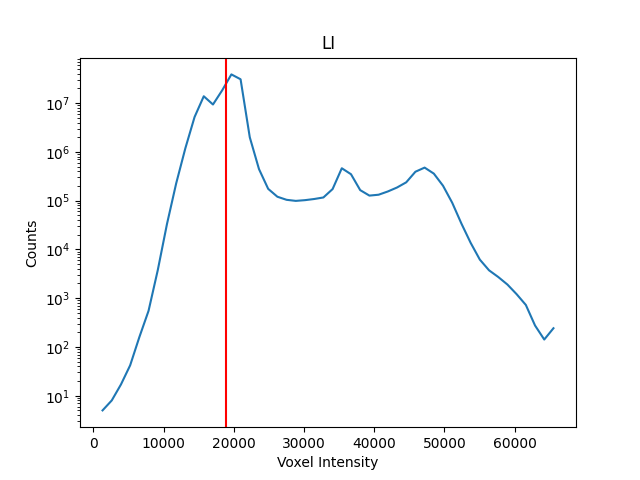

In [20]:
method = 'LI'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

RENYI_ENTROPY threshold: 22019.10546875

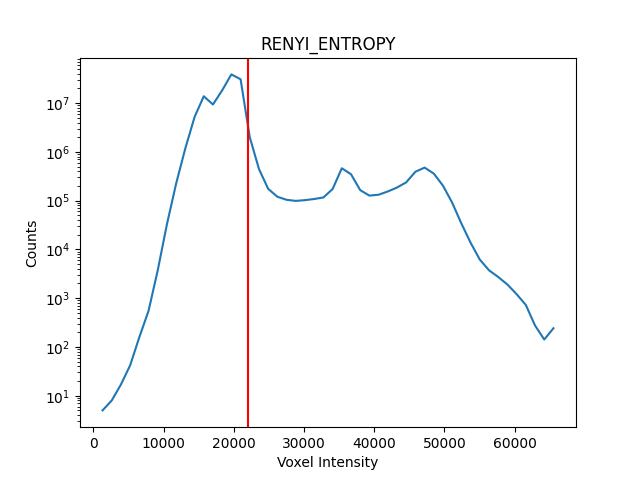

In [21]:
method = 'RENYI_ENTROPY'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

TRIANGLE threshold: 23043.25

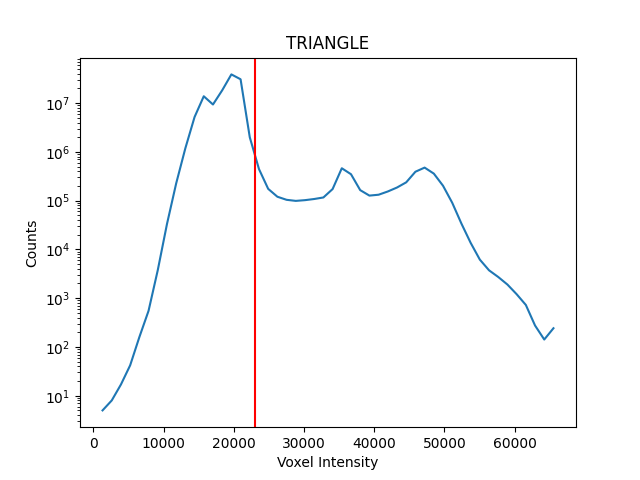

In [22]:
method = 'TRIANGLE'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

## Select thresholding values

In [23]:
thresholds

{'HUANG': 16898.3828125,
 'INTERMODES': 32260.548828125,
 'ISO_DATA': 30212.259765625,
 'KITTLER_ILLINGWORTH': None,
 'LI': 18946.671875,
 'MAXIMUM_ENTROPY': 22019.10546875,
 'MOMENTS': 20994.9609375,
 'OTSU': 29700.1875,
 'RENYI_ENTROPY': 22019.10546875,
 'SHANBHAG': None,
 'TRIANGLE': 23043.25,
 'YEN': None}

In [24]:
segments_greyvalues = {
    "Bone": [thresholds['OTSU'], 65535], # [MaxEntropy, MaxIntensity]
    }

segments_greyvalues

{'Bone': [29700.1875, 65535]}

In [25]:
grey_df = pd.DataFrame(segments_greyvalues)

outputfile = output_directory / 'segments_greyvalues.csv'
grey_df.to_csv(outputfile, index=False)